The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In [1]:
#importing libraries
#!pip install imbalanced-learn,  only uncomment this if ModuleNotFoundError: No module named 'imblearn' shows up
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Reading the data into a dataframe
data= pd.read_csv("C:/Users/HP/Downloads/archive (2)/data.csv")

In [3]:
#checking the data
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
#checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
#checking for null values
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [6]:
#removing any duplicates
data.drop_duplicates(keep='first',inplace=True)

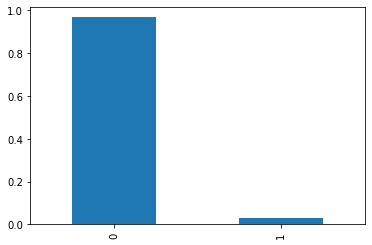

In [7]:
#plot a class balance where 0, indicate "Not Bankrupt" and 1 indicate "Bankrupt"
data["Bankrupt?"].value_counts(normalize=True).plot(kind="bar");

From the bar chart above we can observe that the data is imbalanced and thus needs to be over sampled

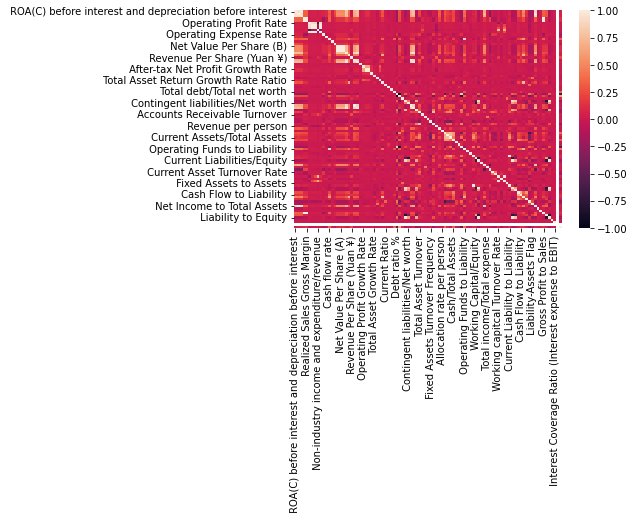

In [8]:
#plotting a correlation heatmap of features in data
corr= data.drop(columns="Bankrupt?").corr()
sns.heatmap(corr);

In [9]:
#Splitting the data into train and test set
#x = data.iloc[:, 1:-1].values
#y = data.iloc[:, -1].values

In [10]:
#splitting data into feature matrix and target vector
target= "Bankrupt?"
x= data.drop(columns=[target])
y= data[target]

In [11]:
#splitting and setting random state to enable reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (5455, 95) (5455,)
Shape for testing data (1364, 95) (1364,)


*** Resampling data ***


Creating a new feature matrix x_train_under and target vector y_train_under by performing random under sampling on training.

In [12]:
#instantiate random sample
under_sampler= RandomUnderSampler(random_state=42)

In [13]:
#fitting into the training data
x_train_under, y_train_under= under_sampler.fit_resample(x_train, y_train)
x_train_under.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.547409,0.597580,0.583757,0.604707,0.604707,0.999089,0.797593,0.809456,0.303629,0.781726,...,0.831586,0.001479,0.624287,0.604706,0.842928,0.279743,0.026801,0.565205,1,0.029354
1,0.575196,0.622928,0.609187,0.606142,0.606142,0.999085,0.797859,0.809654,0.304102,0.781934,...,0.845096,0.001891,0.624553,0.606139,0.843117,0.277089,0.026791,0.565159,1,0.050445
2,0.490567,0.552933,0.539483,0.629665,0.629520,0.999108,0.797607,0.809484,0.303613,0.781755,...,0.810341,0.001115,0.624214,0.629664,0.840741,0.275084,0.026791,0.565158,1,0.250781
3,0.543899,0.598779,0.593180,0.602740,0.602754,0.999041,0.797495,0.809399,0.303559,0.781664,...,0.828565,0.001621,0.623379,0.602735,0.843240,0.282201,0.026865,0.565489,1,0.023104
4,0.608980,0.658689,0.655174,0.612491,0.613183,0.999193,0.798374,0.810111,0.304774,0.782440,...,0.867959,0.010567,0.621156,0.612491,0.843773,0.275537,0.026791,0.565158,1,0.123342


creating a new feature matrix x_train_over and target vector y_train_over by performing random over sampling on training

In [14]:
#instantiate random sample
over_sampler= RandomOverSampler(random_state=42)

In [15]:
#fitting into the training data
x_train_over, y_train_over= over_sampler.fit_resample(x_train, y_train)
x_train_over.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


*** Building model ***

In [16]:
#calculating baseline accuracy
acc_baseline= y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline,2))

Baseline Accuracy: 0.97


*** Iterate ***



creating three identical model for regular x train, over and under sampled data

In [17]:
#instantiate our model to regular data
model_reg= make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42))
#fitting the model to the data
model_reg.fit(x_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [18]:
#instantiate our model to under data
model_under= make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42))
#fitting the model to the under sampled data
model_under.fit(x_train_under, y_train_under)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [19]:
#instantiate our model to under data
model_over= make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42))
#fitting the model to the under sampled data
model_over.fit(x_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

*** Evaluating ***


In [20]:
#calculating our training and test accuracy for the three models
for m in [model_reg, model_under, model_over]:
    acc_train= m.score(x_train, y_train)
    acc_test= m.score(x_test, y_test)
print("Training Accuracy:", round(acc_train,2)*100,"%")
print("Test Accuracy:", round(acc_test, 3)*100,"%")

Training Accuracy: 100.0 %
Test Accuracy: 96.0 %


plotting a confusion matrix

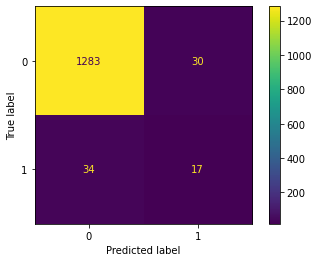

In [21]:
ConfusionMatrixDisplay.from_estimator(model_reg, x_test, y_test);

In [22]:
#Determining the depth of decision tree in the model_over
depth= model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

53


In [23]:
#Determining the depth of decision tree in the model_under
depth_under= model_under.named_steps["decisiontreeclassifier"].get_depth()
print(depth_under)

11


*** Communicating results ***

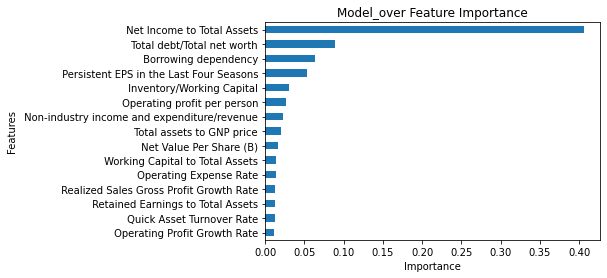

In [24]:
#creating a horizontal bar chart for first 15 most important features for model_over
#get importances
importances= model_over.named_steps["decisiontreeclassifier"].feature_importances_
#putting importances in a series
feat_imp= pd.Series(importances, index= x_train_over.columns).sort_values()
#plot Series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Model_over Feature Importance");

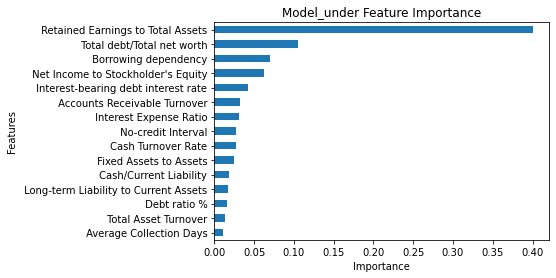

In [25]:
#creating a horizontal bar chart for first 15 most important features for model_under
#get importances
importances_under= model_under.named_steps["decisiontreeclassifier"].feature_importances_
#putting importances in a series
feat_imp_under= pd.Series(importances_under, index= x_train_under.columns).sort_values()
#plot Series
feat_imp_under.tail(15).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Model_under Feature Importance");

*** Using Random Forrest ***

Oversampling

In [26]:
"""Iterate"""
clf= make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [27]:
#performing k-fold cross validation
cv_acc_scores= cross_val_score(clf, x_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.99338061 0.99432624 0.99432356 0.99668874 0.99432356]


In [28]:
#instantiating RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
#fitting random forest classifier to training data
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [29]:
#making predictions
y_pred = classifier.predict(x_test)
#calculating predictions accuracy score
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(acc, 3)*100,"%")

Test Accuracy: 96.6 %


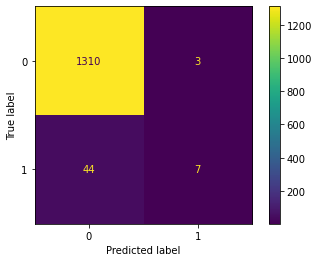

In [30]:
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test);

*** Using Support Vector Machine***

In [31]:
#instantiating svc
classifier_svc = SVC(random_state = 42)
#fitting the model to training data
classifier_svc.fit(x_train, y_train)

SVC(random_state=42)

In [32]:
#predicting results with svc
y_pred_svc = classifier_svc.predict(x_test)

In [33]:
#calculating predictions accuracy score
acc_svc = accuracy_score(y_test, y_pred_svc)
print("Test Accuracy:", round(acc, 3)*100,"%")

Test Accuracy: 96.6 %


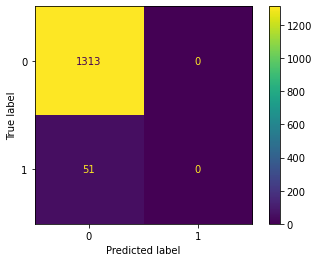

In [34]:
ConfusionMatrixDisplay.from_estimator(classifier_svc, x_test, y_test);

In [35]:
"""Using Logistic Regression"""
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [36]:
#making predictions with logistic regression model
y_pred_lr = classifier_lr.predict(x_test)

In [37]:
#calculating predictions accuracy score
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy:", round(acc, 3)*100,"%")

Test Accuracy: 96.6 %


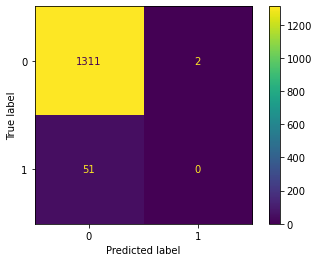

In [38]:
#plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(classifier_lr, x_test, y_test);